In [10]:
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Caffeine half life varies between 3 to 7 hours in healthy adults [Wikipedia](https://en.wikipedia.org/wiki/Caffeine)

In [107]:
NUM_DAYS = 100
DATA_RANGE = 24 * NUM_DAYS
HALF_LIFE = 6
DECAY = np.exp(np.log(0.5) / HALF_LIFE)

In [139]:
caffeine_doses = collections.defaultdict(int)
for i in range(NUM_DAYS):
    caffeine_doses.update({i*24 + 6: 100})
    caffeine_doses.update({i*24 + 13: 64})

caffeine_doses = np.array([caffeine_doses[i] for i in range(DATA_RANGE)])
caffeine_in_body = np.zeros(DATA_RANGE)

for i in range(0, DATA_RANGE):
    dose_now = caffeine_doses[i]
    prev_caffeine = caffeine_in_body[i-1] if i > 0 else 0
    caffeine_in_body[i] = dose_now + DECAY * prev_caffeine

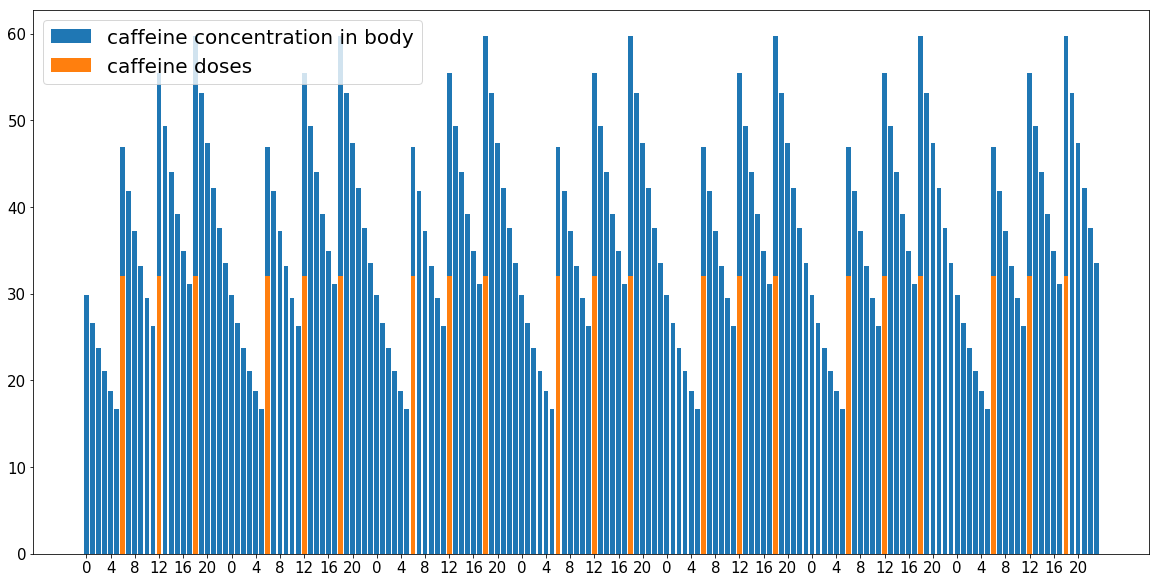

In [140]:
plt.figure(figsize=(20, 10))
plt.bar(np.arange(7*24), caffeine_in_body[-7*24:], label='caffeine concentration in body')
plt.bar(np.arange(7*24), caffeine_doses[-7*24:], label='caffeine doses')
ticks = np.arange(0, 7*24, 4)
plt.xticks(ticks, labels=ticks%24)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize=20)

In [124]:
min(caffeine_in_body[33:]), np.mean(caffeine_in_body[33:]), max(caffeine_in_body[33:])

(24.686205619015418, 97.97855497397148, 222.54394367282333)